In [1]:
import backtester272 as bt
import pandas as pd
import numpy as np

# Load data

In [2]:
def load_data(name):
    data = pd.read_csv(f'data/{name}.csv')
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    data = data.sort_index()
    return data


#benchmark = load_data('benchmark')
weights = load_data('weights')  
sectors = load_data('sectors')


In [3]:
sectors

,Financials,Consumer Staples,Materials,Energy,Industrials,Health Care,Communication Services,Utilities,Consumer Discretionary,Information Technology,Real Estate
Date,,,,,,,,,,,
2011-05-09,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2011-05-10,101.279328,100.439375,101.431208,100.735359,101.182716,100.004909,100.071333,101.038121,101.137178,101.489142,100.988875
2011-05-11,101.564491,101.224642,100.297198,100.446468,101.473118,101.067694,101.060745,101.958113,102.068410,101.636641,101.165460
2011-05-12,100.800823,101.439656,98.737624,98.756894,100.548226,101.735310,100.175350,101.156045,101.477435,101.139950,100.688681
2011-05-13,99.769005,101.570534,98.262015,98.100324,100.276834,102.317903,99.292570,100.475121,101.289398,100.711645,100.476779
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-17,277.413819,238.774619,220.909602,196.443013,371.818837,416.862231,162.127103,211.777745,339.944067,455.043600,159.680214
2025-02-18,280.686978,237.908371,220.554499,196.967843,374.501225,419.511364,162.974434,210.643215,338.721563,449.988629,159.452211
2025-02-19,277.115436,237.930581,215.282051,196.302169,368.738607,419.335821,162.121520,212.151951,333.409933,448.026581,157.748538


In [4]:
wip = bt.Backtester(sectors, benchmark_weights=weights)

In [5]:
start_date = sectors.index[0].strftime('%Y-%m-%d')
end_date = sectors.index[-1].strftime('%Y-%m-%d')

global_params = {
    'start_date': start_date,
    'end_date': end_date,
    'freq': 30 * 6,
    'window': 30 * 6,
    'freq_tactical': 30,
    'window_tactical': 30 * 2,
    'aum': 100,
    'transaction_cost': 0
}

stategy_constraints = {
    'max_weight': 0.35,
    'min_weight': 0.025,
    'risk_free_rate': 0.02,
    'total_exposure': 1.0,
    'max_turnover': 1,
    'max_tracking_error': 0.05,
    'lmd_ridge': 0
}

tactical_constraints = {
    'alpha': 0.25,
    'delta': 30,
}

MSM = wip.run(**global_params, strategy=bt.MaxSharpeStrategy(**stategy_constraints), tactical=bt.MomentumTactical(**tactical_constraints))
#MSV = wip.run(**global_params, strategy=bt.MaxSharpeStrategy(**stategy_constraints), tactical=bt.ValueTactical(**tactical_constraints))
ERCM = wip.run(**global_params, strategy=bt.EqualRiskContributionStrategy(**stategy_constraints), tactical=bt.MomentumTactical(**tactical_constraints))
# EW = wip.run(**global_params, strategy=bt.EqualWeightStrategy())
# MV = wip.run(**global_params, strategy=bt.MinVarianceStrategy(**stategy_constraints))

In [6]:
start_date

'2011-05-09'

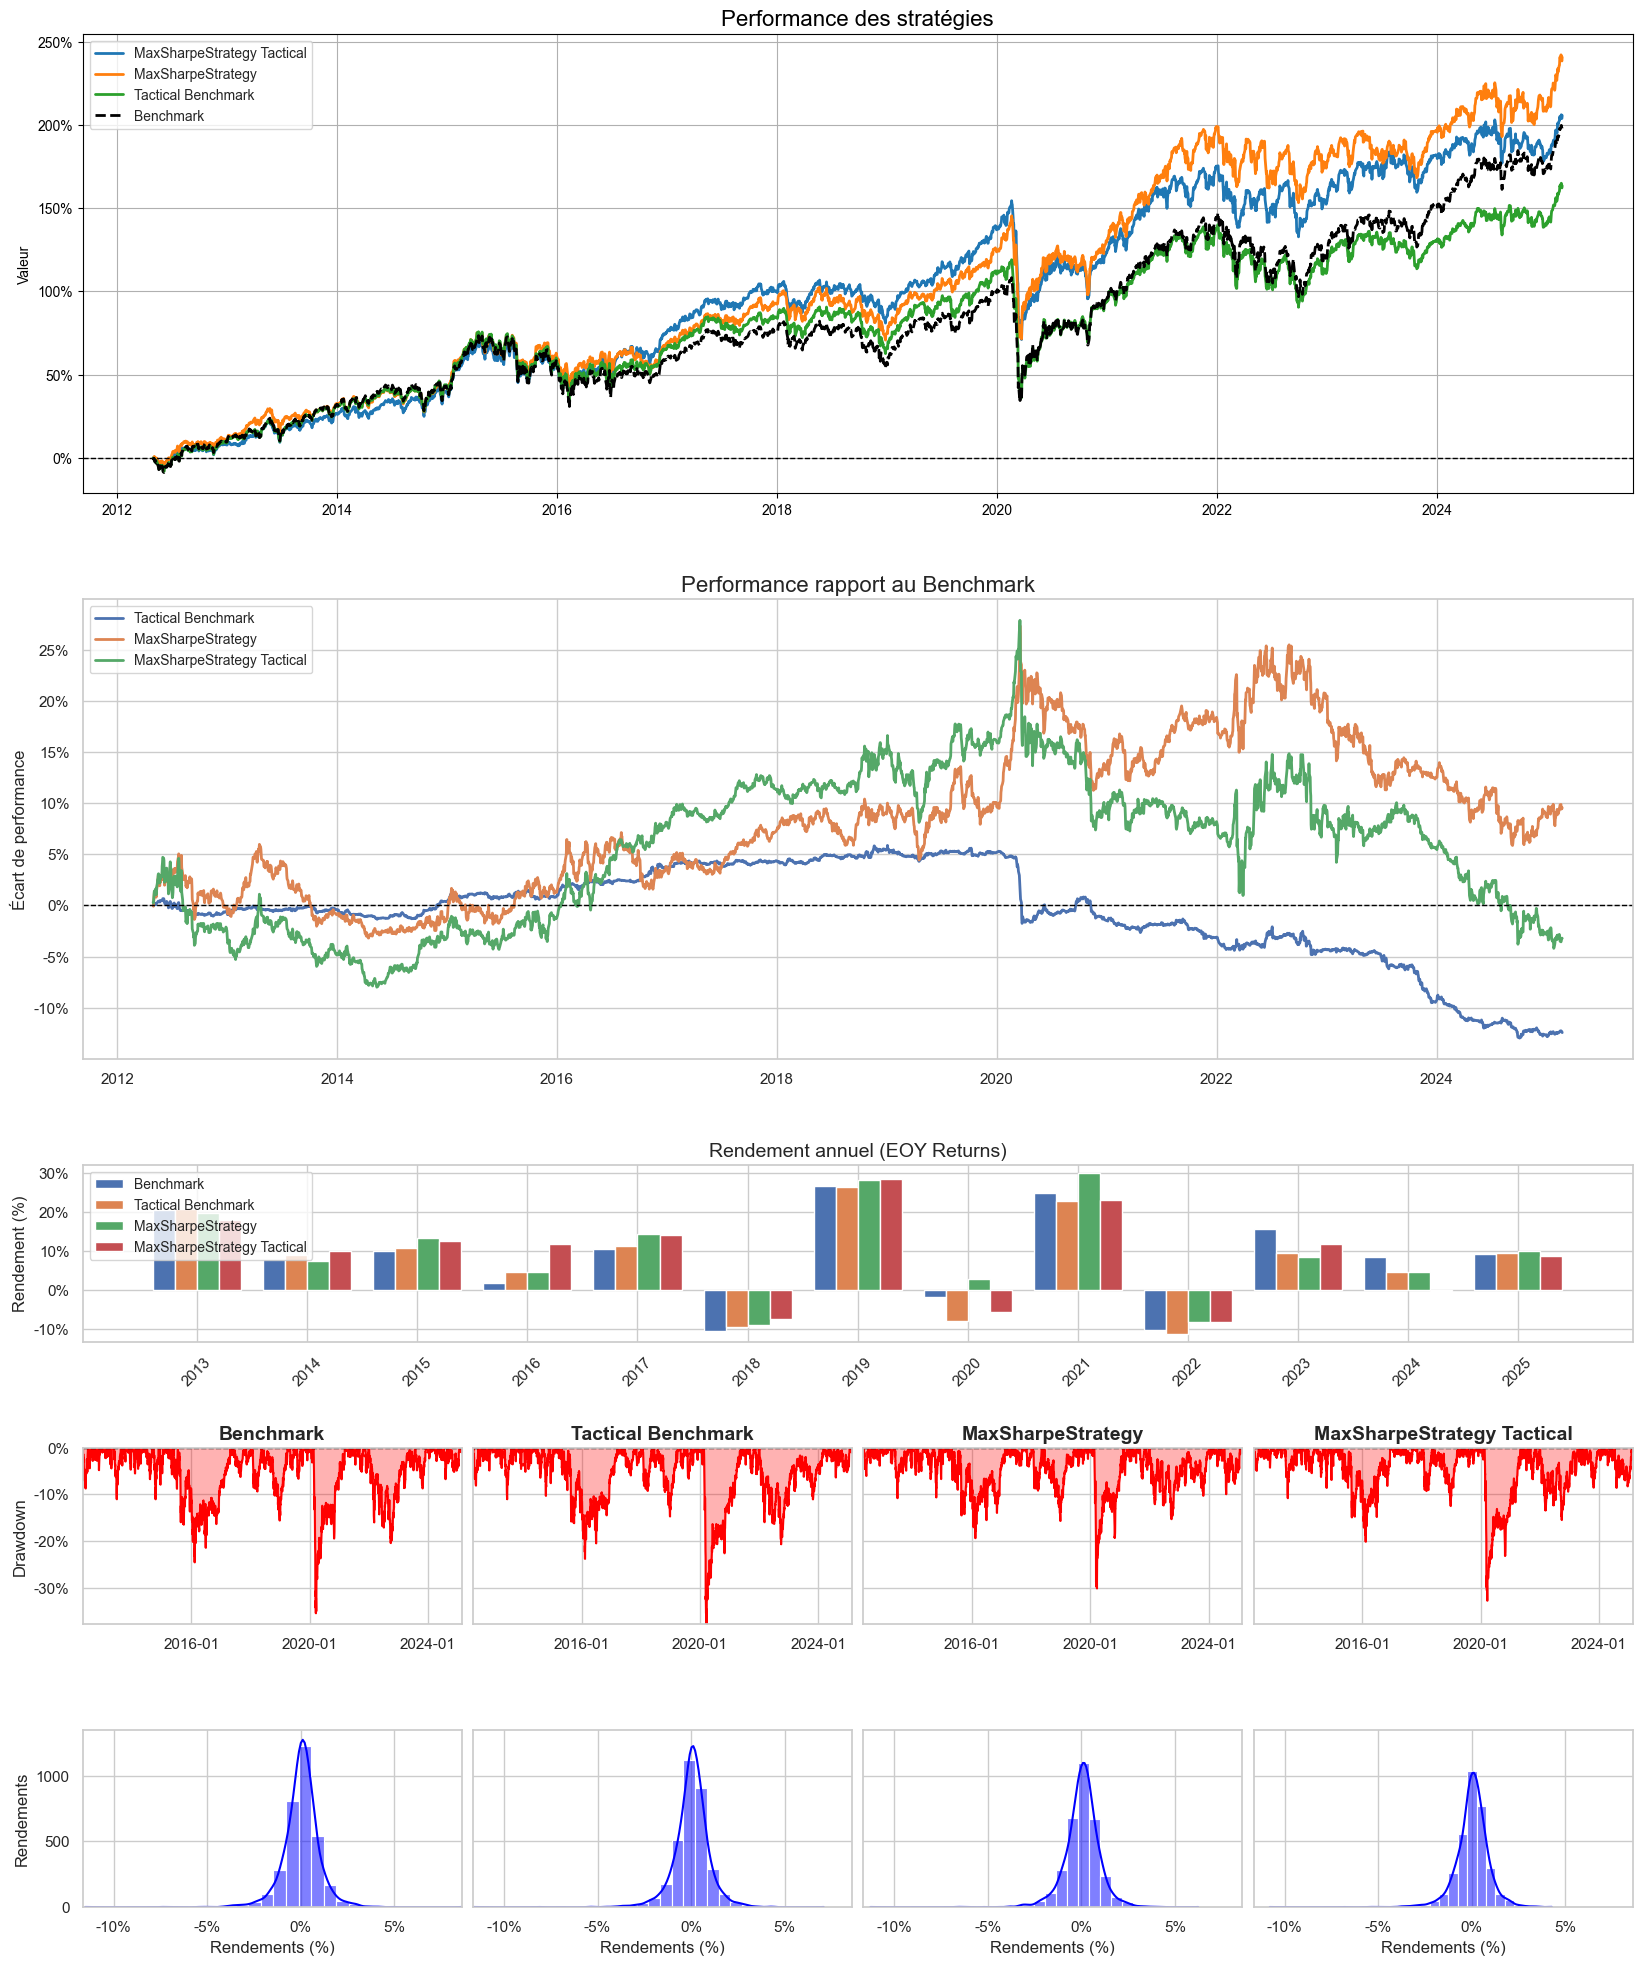

|                              | Benchmark   | Tactical Benchmark   | MaxSharpeStrategy   | MaxSharpeStrategy Tactical   |
|:-----------------------------|:------------|:---------------------|:--------------------|:-----------------------------|
| Performance                  | 198.52%     | 163.51%              | 240.74%             | 205.68%                      |
| CAGR                         | 8.73%       | 7.70%                | 9.84%               | 8.93%                        |
| Volatility                   | 15.48%      | 15.17%               | 14.76%              | 13.90%                       |
| Max Drawdown                 | -35.43%     | -37.83%              | -30.12%             | -32.75%                      |
| Sharpe Ratio                 | 0.62        | 0.57                 | 0.71                | 0.69                         |
| Annualized Transactions Cost | 0.00%       | 0.00%                | 0.00%               | 0.00%                        |
| Tracking Error

In [7]:
MSM.visualize()

In [8]:
MSM.positions("tactical")

In [9]:
MSM.positions()

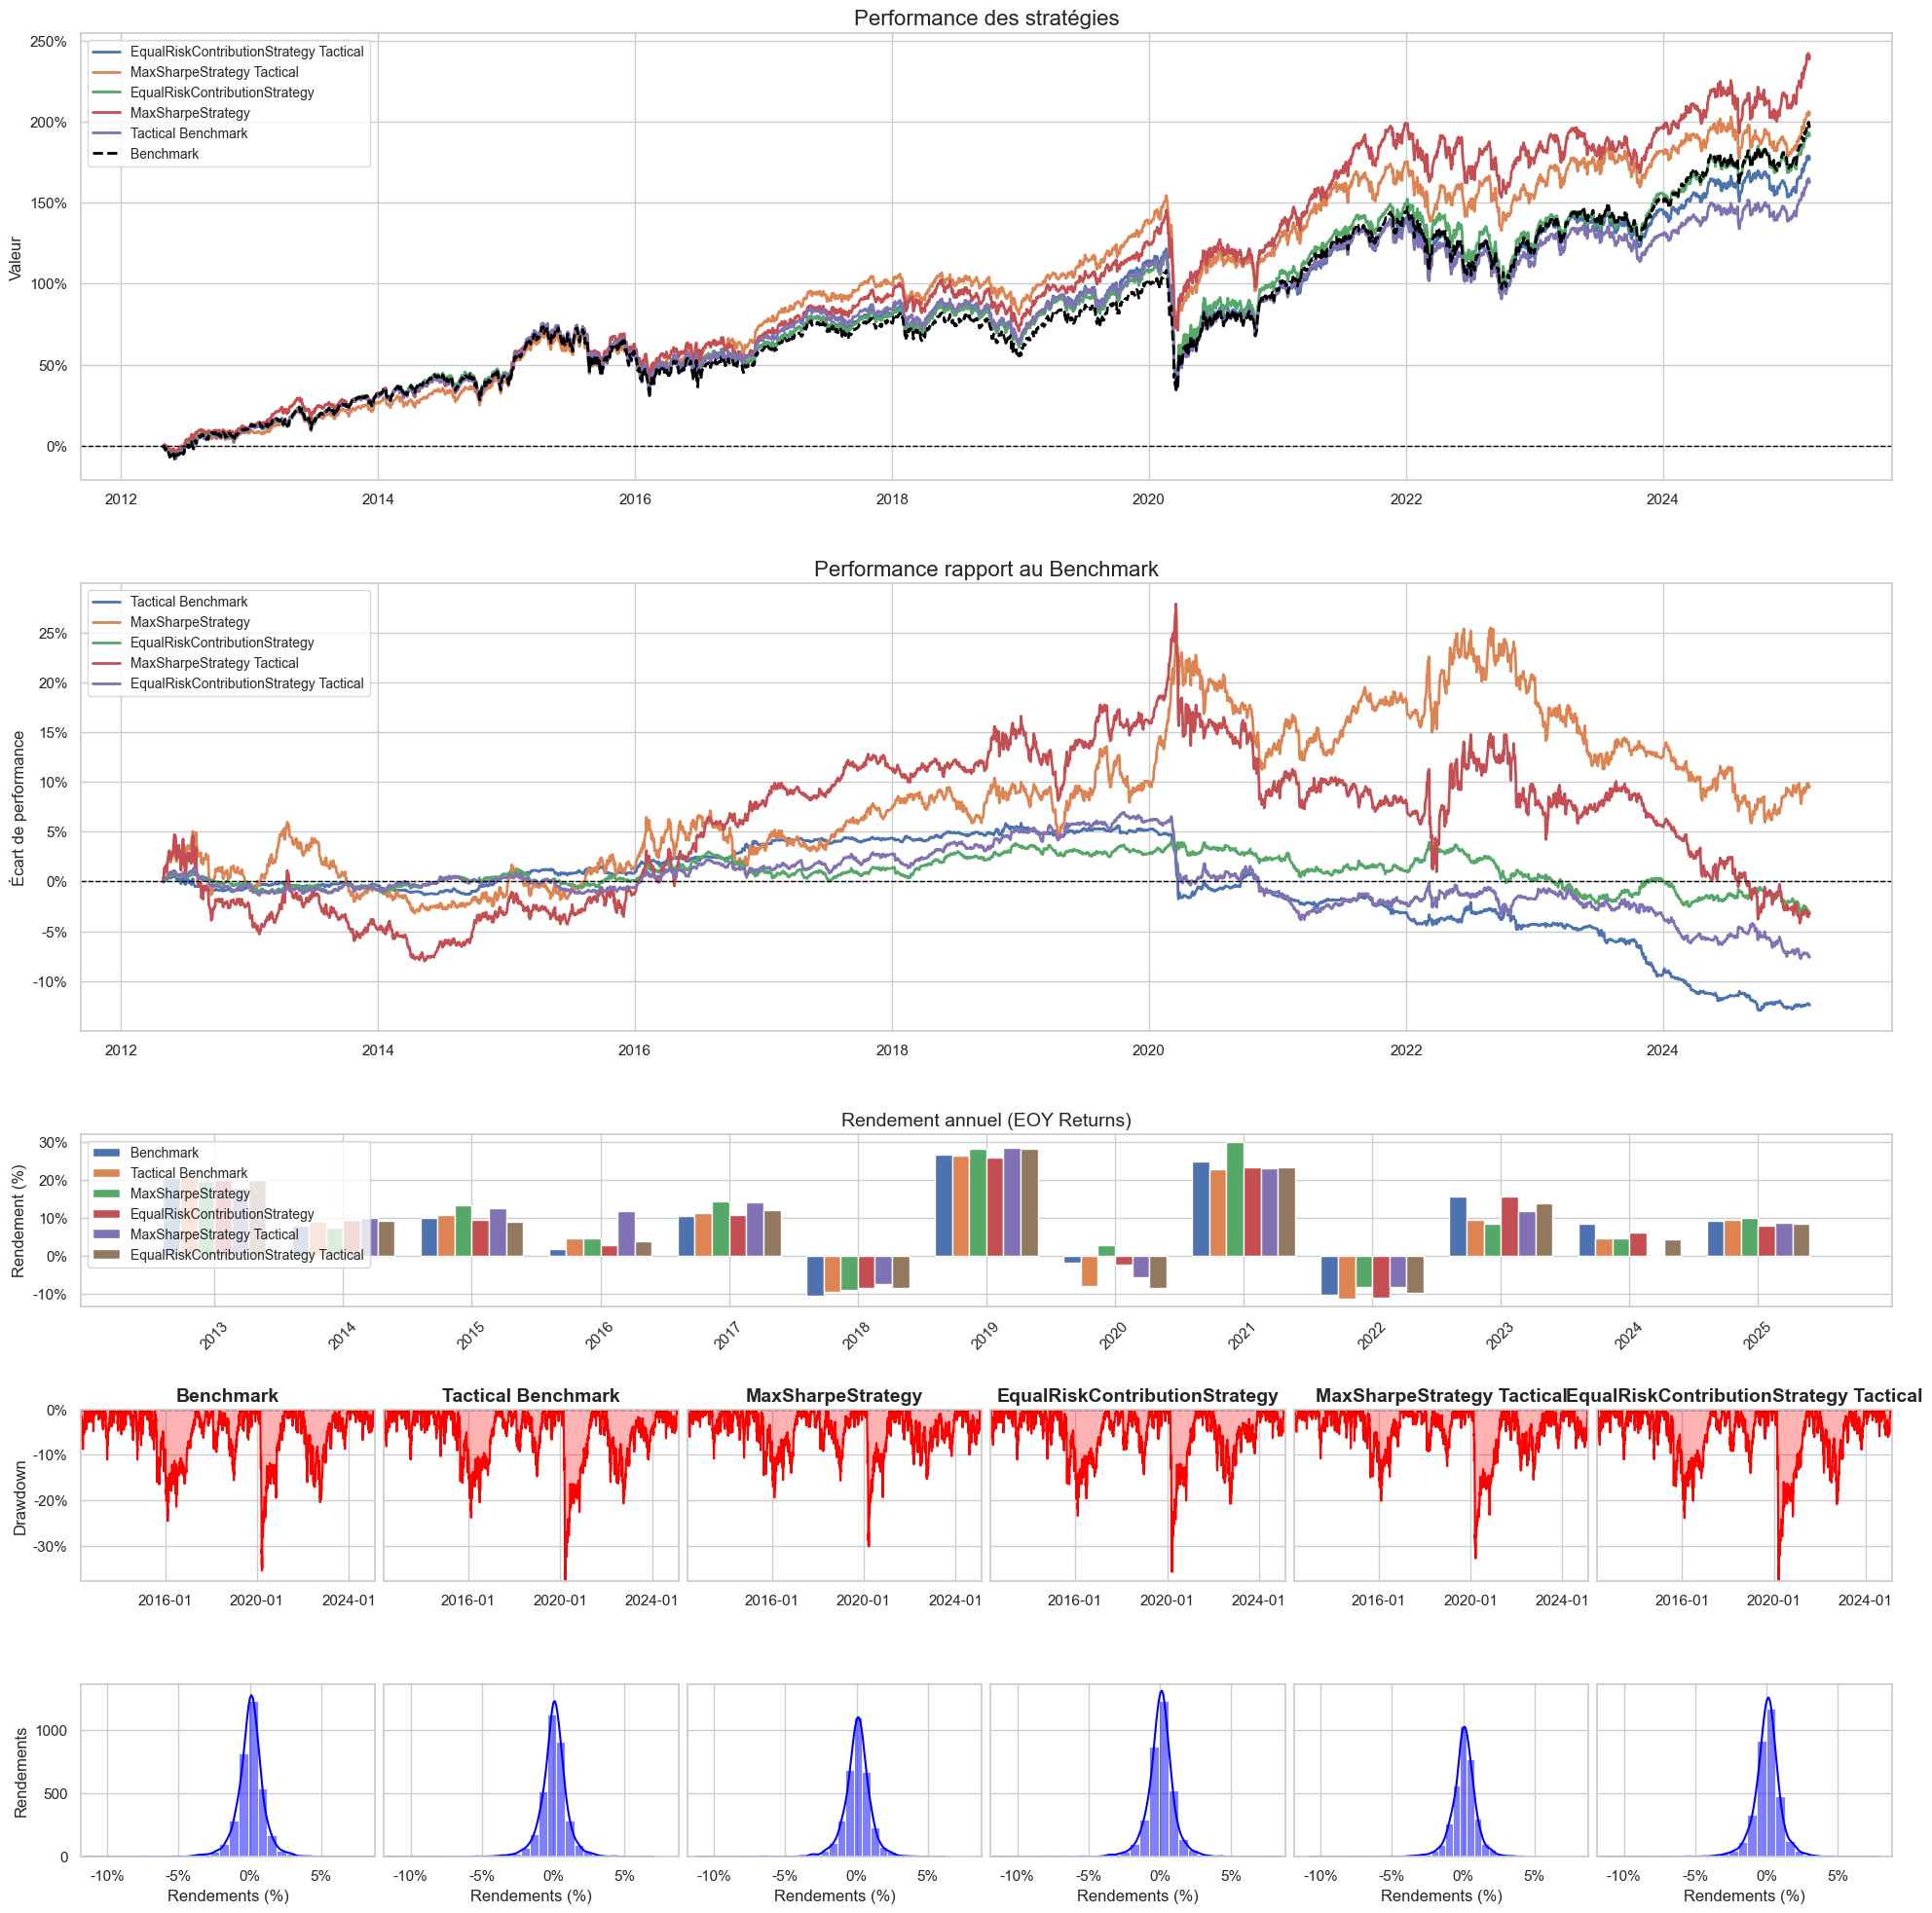

|                              | Benchmark   | Tactical Benchmark   | MaxSharpeStrategy   | EqualRiskContributionStrategy   | MaxSharpeStrategy Tactical   | EqualRiskContributionStrategy Tactical   |
|:-----------------------------|:------------|:---------------------|:--------------------|:--------------------------------|:-----------------------------|:-----------------------------------------|
| Performance                  | 198.52%     | 163.51%              | 240.74%             | 192.65%                         | 205.68%                      | 177.81%                                  |
| CAGR                         | 8.73%       | 7.70%                | 9.84%               | 8.57%                           | 8.93%                        | 8.14%                                    |
| Volatility                   | 15.48%      | 15.17%               | 14.76%              | 15.32%                          | 13.90%                       | 15.28%                                   |


In [10]:
MSM.compare(ERCM)

In [11]:
MS.positions('benchmark')
MS.positions()

NameError: name 'MS' is not defined

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def rolling_regression_R2(y, X, window=60):
    """
    Calcule le R² d'une régression linéaire sur une fenêtre roulante.
    
    Args:
        y (pd.Series): Série temporelle du benchmark.
        X (pd.Series): Série temporelle d'un secteur.
        window (int): Taille de la fenêtre roulante.
    
    Returns:
        pd.Series: R² pour chaque fenêtre roulante.
    """
    r2_values = []
    # Indices sur lesquels le R² sera calculé
    index = y.index[window - 1:]
    for i in range(window, len(y) + 1):
        y_window = y.iloc[i - window:i]
        X_window = X.iloc[i - window:i]
        # Ajout d'une constante pour l'intercept
        X_window_const = sm.add_constant(X_window)
        model = sm.OLS(y_window, X_window_const).fit()
        r2_values.append(model.rsquared)
    return pd.Series(r2_values, index=index)

# Supposons que benchmark contient les rendements du benchmark
# et sectors est un DataFrame où chaque colonne correspond aux rendements d'un secteur.
# Par exemple, vous pouvez calculer les rendements si ce sont des prix :
# benchmark = benchmark.pct_change().dropna()
# sectors = sectors.pct_change().dropna()

window = 365  # fenêtre de 60 périodes

# Créer un dictionnaire pour stocker le R² roulants pour chaque secteur
rolling_r2 = {}

for sector in sectors.columns:
    # Assurez-vous que les index des séries sont alignés
    aligned_data = pd.concat([benchmark, sectors[sector]], axis=1, join='inner')
    aligned_data.columns = ['benchmark', 'sector']
    r2_series = rolling_regression_R2(aligned_data['benchmark'], aligned_data['sector'], window)
    rolling_r2[sector] = r2_series

# Par exemple, pour afficher le R² roulant d'un secteur donné :
sector_to_plot = sectors.columns[0]
for sector_to_plot in sectors.columns:
    rolling_r2[sector_to_plot].plot(title=f"Rolling R² for sector: {sector_to_plot}")

NameError: name 'benchmark' is not defined

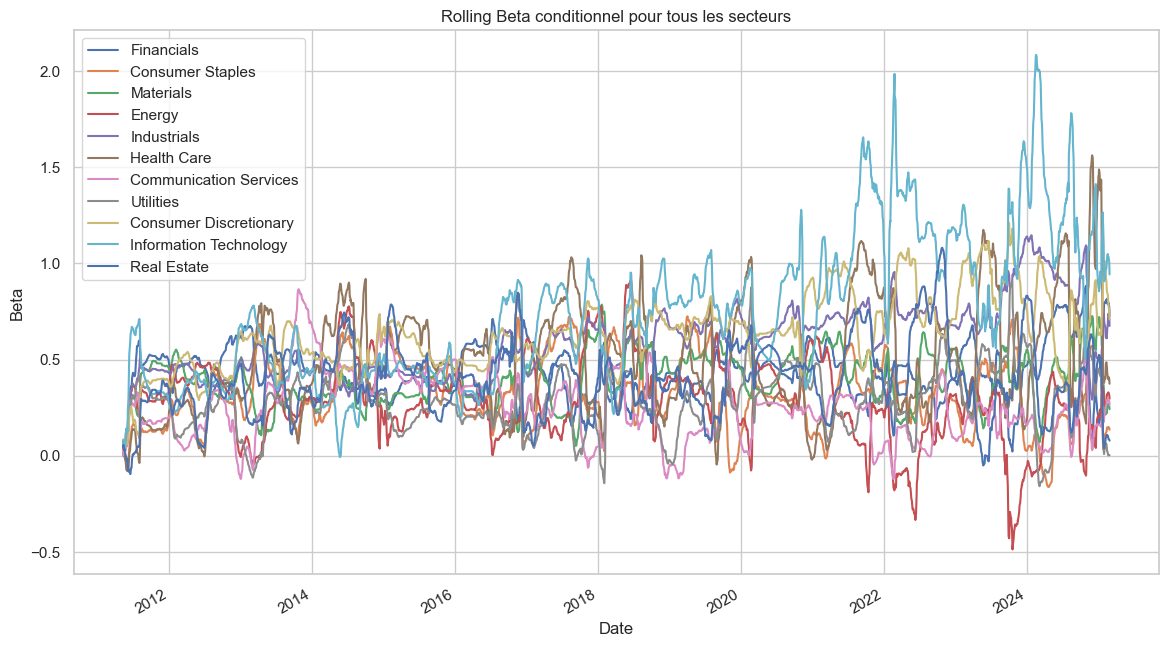

In [ ]:
def rolling_beta_ewma(benchmark: pd.Series, sector: pd.Series, span: int = 60) -> pd.Series:
    """
    Calcule le beta roulant conditionnel à l'aide d'un estimateur EWMA.
    
    Args:
        benchmark (pd.Series): Série temporelle des rendements du benchmark.
        sector (pd.Series): Série temporelle des rendements du secteur.
        span (int): Période utilisée pour l'estimation EWMA (plus faible span => plus de poids aux observations récentes).
        
    Returns:
        pd.Series: Série temporelle du beta conditionnel.
    """
    # Calcul de la covariance conditionnelle (EWMA)
    rolling_cov = benchmark.ewm(span=span, adjust=False).cov(sector)
    # Calcul de la variance conditionnelle du benchmark (EWMA)
    rolling_var = benchmark.ewm(span=span, adjust=False).var()
    # Calcul du beta conditionnel : beta = cov / var
    beta = rolling_cov / rolling_var
    return beta

# Calculer les beta conditionnels pour tous les secteurs
beta_sectors = {}
for sector in sectors.columns:
    beta_sectors[sector] = rolling_beta_ewma(benchmark.squeeze(), sectors[sector], span=60)

# Tracer les beta conditionnels pour tous les secteurs sur un même graphique
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for sector, beta_series in beta_sectors.items():
    beta_series.plot(label=sector)

plt.title("Rolling Beta conditionnel pour tous les secteurs")
plt.xlabel("Date")
plt.ylabel("Beta")
plt.legend()
plt.show()

In [ ]:
benchmark

,SXXP Index
Date,
2000-01-03,377.69
2000-01-04,362.70
2000-01-05,353.74
2000-01-06,352.21
2000-01-07,359.75
...,...
2025-02-20,551.01
2025-02-21,553.85
2025-02-24,553.39
